In [ ]:
from keras.datasets import mnist

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X Training data",len(x_train))
print("Y Training data",len(y_train))
print("X Testing  data",len(x_test))
print("Y Testing Data",len(y_test))

X Training data 60000
Y Training data 60000
X Testing  data 10000
Y Testing Data 10000


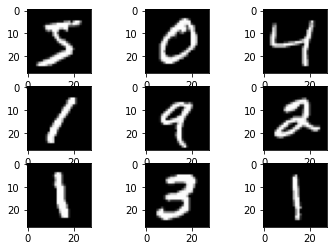

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
# from keras.optimizers import RMSprop,Adam
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

In [ ]:
#Unique value of the target variable
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#define model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(10, activation='softmax'))
# model.add(Dropout(0.1))
l2_reg = 0.001

#Defining the CNN Model
cnn_model  =  Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (2,2), input_shape = (28,28,1), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
# cnn_model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
# cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.1))


# cnn_model = Sequential()
# cnn_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# cnn_model.add(MaxPooling2D((2, 2)))
# cnn_model.add(Flatten())
# cnn_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# cnn_model.add(Dense(10, activation='softmax'))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(16, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))


In [ ]:
#optimization of model
opt = SGD(learning_rate=0.01, momentum=0.9)
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       16512     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 128)         0         
                                                                 
 flatten (Flatten)           (None, 4608)              0

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [ ]:
# #Compiling the model
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

# Training the CNN Model
# history = model.fit(x_train, y_train, batch_size=32, epochs=10,verbose=1,validation_data=(x_test, y_test))


In [ ]:
# Training the CNN Model
history = cnn_model.fit(x_train, y_train, batch_size=28, epochs=10,verbose=1)
# history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=28, validation_data=(x_test, y_test), verbose=0)

Epoch 1/10


ValueError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
lb_encode=LabelEncoder()
y_test = pd.DataFrame(y_test)
y_test = lb_encode.fit_transform(y_test[0])
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
scores=cnn_model.evaluate(x_test,y_test,verbose=1)
print("Test loss",scores[0])
print("Test accuracy",scores[1])

ValueError: ignored

In [ ]:
cnn_model  =  Sequential()
cnn_model.add(Conv2D(28, kernel_size = (3,3), input_shape = (28,28,1), activation = 'relu'))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
# cnn_model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
# cnn_model.add(MaxPool2D(pool_size = (2,2)))
# cnn_model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
# cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dropout(0.1))


In [ ]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 12.5439 - accuracy: 0.1468
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 12.6232 - accuracy: 0.1551
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 12.2618 - accuracy: 0.1837
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 12.5122 - accuracy: 0.1669
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 12.3322 - accuracy: 0.1820
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 12.4980 - accuracy: 0.1690
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 12.6924 - accuracy: 0.1554
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 12.7674 - accuracy: 0.1485
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 12.7528 - accuracy: 0.1492
Epoch 10/10
1875/1875 [==============================] 

In [ ]:
imgp="/content/drive/MyDrive/Colab Notebooks/1.jpg"
imgp3="/content/drive/MyDrive/Colab Notebooks/3.PNG"

In [ ]:
import cv2

In [ ]:
img1=cv2.imread(imgp)
img3=cv2.imread(imgp3)

In [ ]:
img=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img.shape
imgt3=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

In [ ]:
img=cv2.resize(img1,(28,28))
imgt3=cv2.resize(imgt3,(28,28))

10000
8


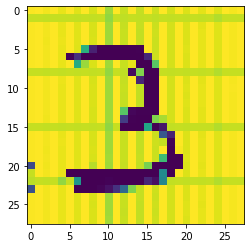

In [ ]:
test_img = np.expand_dims(imgt3,axis=0)
pred_test = np.argmax(cnn_model.predict(x_test),axis=1)

prediction_test = lb_encode.inverse_transform(pred_test)
print(len(prediction_test))
print(prediction_test[3])
plt.imshow(imgt3)



In [ ]:
y_test[5000]

3

In [ ]:
np.argmax(pred_test[5000])

0

In [ ]:
pred_test[5000]

8